<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height=""> </center>
<br><br>
<div align="center"><span style="font-size: 26px;"><strong>Análise de Dados Com Python</strong></span>
</div><br><br></center>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>

<div style="border: 2px solid black; padding: 10px; width: 100%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        K-Means Passo-a-Passo
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

Vamos criar um exemplo básico referente ao método de clusterização o K-Means, que se pode resolver à mão, ideal para compreensão ao passo que iremos, em cada etapa, apresentando a implementação computacional da mesma.

In [1]:
# !pip install -U scikit-learn --user

In [2]:
import warnings

# Suprimir avisos de usuário específicos
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL*")

# K-Means com 2 clusters 

## Processo Passo a Passo

### Dados

Consideremos o seguinte conjunto de dados $X=\{(1,1),(4.5,5),(1.5,2),(3,4),(5,7),(3.5,5)\}$:

In [3]:
import numpy as np

# Dados
X = np.array([[1, 1], [4.5, 5], [1.5, 2], [3, 4], [5, 7], [3.5, 5]])

### Inicialização dos Parâmetros

Suponhamos incialmente que os clusters tenham centróides $\mu_{1}^{(0)} = (1,1)$ e $\mu_{2}^{(0)} = (5,7)$.

In [4]:
mu = np.array([(1,1),(5,7)])

### Primeira Iteração

In [5]:
clst_1, clst_2 = [], []

#### Passo 1: Atribuição do Clusters

Para cada ponto $x_{i}$ em $X$, calcule a distância ao quadrado para cada $\mu_{k}$ e atribua ao centroide mais próximo:

$$d(x_{i},\mu_{k}) = ||x_{i}-\mu_{k}||^{2}.$$

In [6]:
def d(x_i,mu_k):
    return np.sum(np.abs(x_i-mu_k)**2)

Vejamos a qual cluster pertence $X_{1} = (1,1)$:

Note que 

$d((1,1),(1,1)) = (1-1)^{2} + (1-1)^{2} = 0$

$d((1,1),(5,7)) = (1-5)^{2} + (1-7)^{2} = 52$

Desta forma $X_{1} = (1,1)$ pertence (obviamente) ao Cluster $1$.

In [7]:
d(X[0],mu[0])

0.0

In [8]:
d(X[0],mu[1])

52.0

In [9]:
clst_1.append(X[0])

Note que o pontVejamos a qual cluster pertence $X_{2} = (4.5,5)$:

Note que 

$d((4.5,5),(1,1)) = (4.5-1)^{2} + (5-1)^{2} = 28.25$

$d((4.5,5),(5,7)) = (4.5-5)^{2} + (5-7)^{2} = 4.25$

Desta forma $X_{2} = (4.5,5)$ pertence ao Cluster $2$.

Agora, vejamos a qual cluster pertence $X_{2} = (4.5,5)$:

In [10]:
d(X[1],mu[0])

28.25

In [11]:
d(X[1],mu[1])

4.25

In [12]:
clst_2.append(X[1])

Podemos montar os clusters com o seguinte código (do princípio):

In [13]:
clst_1 = []
clst_2 = []

for i in range(0,len(X)):
    if d(X[i],mu[0]) < d(X[i],mu[1]):
        clst_1.append(X[i])
    else:
        clst_2.append(X[i])

In [14]:
print(f'Cluster 1 atual: {list(clst_1)}')
print(f'Cluster 2 atual: {list(clst_2)}')

Cluster 1 atual: [array([1., 1.]), array([1.5, 2. ])]
Cluster 2 atual: [array([4.5, 5. ]), array([3., 4.]), array([5., 7.]), array([3.5, 5. ])]


#### Passo 2: Atualização dos Centroides

Calculemos o novo centroide de cada cluster como a média de todos os pontos atribuídos a esse cluster:

$$\mu_{j}^{(i+1)} = \frac{1}{\#S_{j}}\sigma_{x_{i} \in S_{j}} x_{i}$$

Para o Cluster $1$, temos:

$\mu_{1} = \frac{1}{2}\left((1,1)+(1.5,2)\right) = \frac{1}{2}(2.5,3) = (1.25, 1.5) $

$\mu_{2} = \frac{1}{3}\left((4.5,5) + (3,4) + (5,7) + (3.5,5)\right) = \frac{1}{4}(16,21) = (4, 5.25)$

In [15]:
mu_1 = np.mean(clst_1, axis=0)
mu_2 = np.mean(clst_2, axis=0)

In [16]:
print(mu_1)
print(mu_2)
print(clst_1)
print(clst_2)

[1.25 1.5 ]
[4.   5.25]
[array([1., 1.]), array([1.5, 2. ])]
[array([4.5, 5. ]), array([3., 4.]), array([5., 7.]), array([3.5, 5. ])]


### Segunda Iteração

O código da segunda iteração encontra-se completo na célula a seguir:

In [17]:
clst_1 = []
clst_2 = []

for i in range(0,len(X)):
    if d(X[i],mu_1) < d(X[i],mu_2):
        clst_1.append(X[i])
    else:
        clst_2.append(X[i])

mu_1 = np.mean(clst_1, axis=0)
mu_2 = np.mean(clst_2, axis=0)

print(mu_1)
print(mu_2)
print(clst_1)
print(clst_2)

[1.25 1.5 ]
[4.   5.25]
[array([1., 1.]), array([1.5, 2. ])]
[array([4.5, 5. ]), array([3., 4.]), array([5., 7.]), array([3.5, 5. ])]


Note que houve uma estabilização dos centróides.

Assim, obtemos

Cluster $1 = \{(1,1), (1.5,2)\}$ centrado em $\mu_{1} = (1.25,1.5)$

Cluster $2 = \{(3,4), (3.5,5), (4.5,5), (5,7)\}$ centrado em $\mu_{2} = (4, 5.25)$

## Processo Iterativo Completo Para 2 Clusters

Considerando dois clusters temos o seguinte código:

In [18]:
import numpy as np

def KMeans(X,mu,max_iter):
    mu_1 = mu[0]
    mu_2 = mu[1]

    def d(u,v):
        return np.sum((u-v)**2)

    for _ in range(max_iter):
        clst_1 = []
        clst_2 = []

        
        for x in X:
            if d(x,mu_1) < d(x,mu_2):
                clst_1.append(x)
            else:
                clst_2.append(x)
          
        
        # Atualização de centróides com verificação de clusters vazios
        if clst_1:
            mu_1 = np.mean(clst_1, axis=0)
        if clst_2:
            mu_2 = np.mean(clst_2, axis=0)
    print('')
    print(f'Cluster 1 = {clst_1}, Centróide = {mu_1}')
    print('')
    print(f'Cluster 2 = {clst_2}, Centróide = {mu_2}')
    print('')
    
    return (mu_1,mu_2), (clst_1,clst_2)

#### Exemplo 1

In [19]:
# Dados de exemplo
X = np.array([[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5]])

mu = np.array([(1,1),(5,7)])

centroids, clusters = KMeans(X,mu,3)


Cluster 1 = [array([1., 1.]), array([1.5, 2. ])], Centróide = [1.25 1.5 ]

Cluster 2 = [array([3., 4.]), array([5., 7.]), array([3.5, 5. ]), array([4.5, 5. ])], Centróide = [4.   5.25]



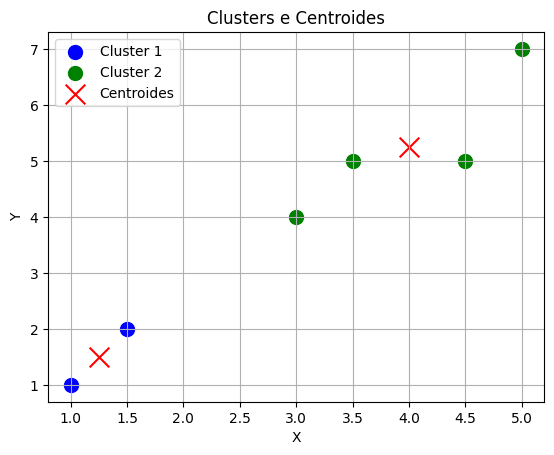

In [20]:
import matplotlib.pyplot as plt

# Cores para os clusters
colors = ['blue', 'green']

# Plotar os clusters e os centroides
plt.figure()
for k in range(2):
    if clusters[k]:  # Verificar se o cluster não está vazio
        cluster = np.array(clusters[k])
        plt.scatter(cluster[:, 0], cluster[:, 1], s=100, color=colors[k], label=f'Cluster {k + 1}')
plt.scatter((centroids[0][0],centroids[1][0]), (centroids[0][1],centroids[1][1]), s=200, color='red', marker='x', label='Centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title(f'Clusters e Centroides')
plt.show()

#### Exemplo 2

In [21]:
# Dados de exemplo
X = np.array([(1, 2), (2, 1), (4, 5), (5, 4), (8, 9), (9, 8), (11, 12), (12, 11)])

# Centroides iniciais
mu = np.array([(1, 1), (2, 7)])

centroids, clusters = KMeans(X,mu,3)


Cluster 1 = [array([1, 2]), array([2, 1]), array([4, 5]), array([5, 4])], Centróide = [3. 3.]

Cluster 2 = [array([8, 9]), array([9, 8]), array([11, 12]), array([12, 11])], Centróide = [10. 10.]



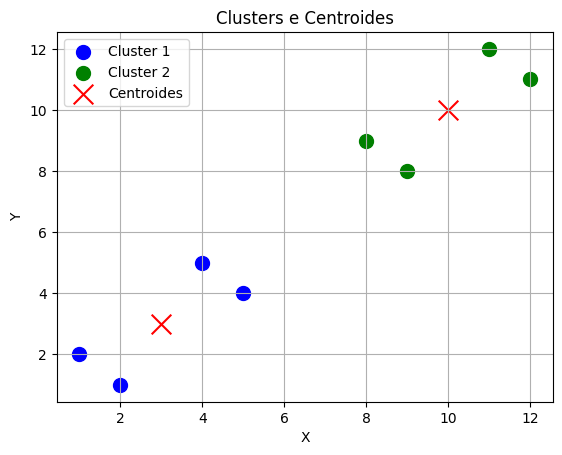

In [22]:
# Cores para os clusters
colors = ['blue', 'green']

# Plotar os clusters e os centroides
plt.figure()
for k in range(2):
    if clusters[k]:  # Verificar se o cluster não está vazio
        cluster = np.array(clusters[k])
        plt.scatter(cluster[:, 0], cluster[:, 1], s=100, color=colors[k], label=f'Cluster {k + 1}')
plt.scatter((centroids[0][0],centroids[1][0]), (centroids[0][1],centroids[1][1]), s=200, color='red', marker='x', label='Centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title(f'Clusters e Centroides')
plt.show()

### Critério de Parada (tol)

Uma vez que podemos exagerar no número de iterações é aconselhável adotarmos um critério de parada com base na convergência dos valores em função de uma tolerância. Acrescentamos essa característica ao código a seguir:

In [23]:
import numpy as np

def KMeans(X, mu, max_iter=100, tol=1e-4):
    mu_1, mu_2 = mu

    def d(u, v):
        return np.sum((u - v) ** 2)

    for _ in range(max_iter):
        clst_1 = []
        clst_2 = []

        # Atribuição dos pontos aos clusters
        for x in X:
            if d(x, mu_1) < d(x, mu_2):
                clst_1.append(x)
            else:
                clst_2.append(x)

        # Atualização dos centroides com verificação de clusters vazios
        if clst_1:
            new_mu_1 = np.mean(clst_1, axis=0)
        else:
            new_mu_1 = mu_1

        if clst_2:
            new_mu_2 = np.mean(clst_2, axis=0)
        else:
            new_mu_2 = mu_2

        # Calcular a diferença usando a norma L_\infty
        diff_1 = np.max(np.abs(new_mu_1 - mu_1))
        diff_2 = np.max(np.abs(new_mu_2 - mu_2))

        # Verificar a condição de parada
        if max(diff_1, diff_2) < tol:
            break


        # Atualizar os centroides
        mu_1, mu_2 = new_mu_1, new_mu_2
        
    print('')
    print(f'Cluster 1 = {clst_1}, Centróide = {mu_1}')
    print('')
    print(f'Cluster 2 = {clst_2}, Centróide = {mu_2}')
    print('')
    
    return (mu_1,mu_2), (clst_1,clst_2)

In [24]:
# Dados de exemplo
X = np.array([[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5]])

mu = np.array([(1,1),(5,7)])

centroids, clusters = KMeans(X,mu,3)


Cluster 1 = [array([1., 1.]), array([1.5, 2. ])], Centróide = [1.25 1.5 ]

Cluster 2 = [array([3., 4.]), array([5., 7.]), array([3.5, 5. ]), array([4.5, 5. ])], Centróide = [4.   5.25]



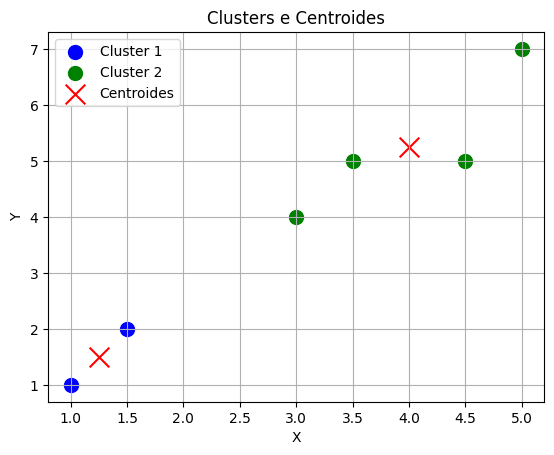

In [25]:
# Cores para os clusters
colors = ['blue', 'green']

# Plotar os clusters e os centroides
plt.figure()
for k in range(2):
    if clusters[k]:  # Verificar se o cluster não está vazio
        cluster = np.array(clusters[k])
        plt.scatter(cluster[:, 0], cluster[:, 1], s=100, color=colors[k], label=f'Cluster {k + 1}')
plt.scatter((centroids[0][0],centroids[1][0]), (centroids[0][1],centroids[1][1]), s=200, color='red', marker='x', label='Centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title(f'Clusters e Centroides')
plt.show()

In [26]:
# Dados de exemplo
X = np.array([(1, 2), (2, 1), (4, 5), (5, 4), (8, 9), (9, 8), (11, 12), (12, 11)])

# Centroides iniciais
mu = np.array([(1, 1), (2, 7)])

centroids, clusters = KMeans(X,mu,3)


Cluster 1 = [array([1, 2]), array([2, 1]), array([4, 5]), array([5, 4])], Centróide = [3. 3.]

Cluster 2 = [array([8, 9]), array([9, 8]), array([11, 12]), array([12, 11])], Centróide = [10. 10.]



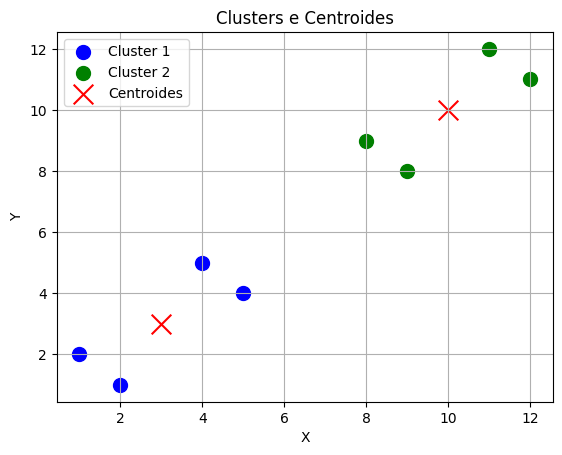

In [27]:
# Cores para os clusters
colors = ['blue', 'green']

# Plotar os clusters e os centroides
plt.figure()
for k in range(2):
    if clusters[k]:  # Verificar se o cluster não está vazio
        cluster = np.array(clusters[k])
        plt.scatter(cluster[:, 0], cluster[:, 1], s=100, color=colors[k], label=f'Cluster {k + 1}')
plt.scatter((centroids[0][0],centroids[1][0]), (centroids[0][1],centroids[1][1]), s=200, color='red', marker='x', label='Centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.title(f'Clusters e Centroides')
plt.show()

## Caso Geral (K Clusters)

In [28]:
def KMeans(X, mu, K, max_iter=100, tol=1e-4):
    
    # Função de distância
    def d(u, v):
        return np.sum((u - v) ** 2)

    # Inicialização dos centroides
    centroids = mu

    for iteration in range(max_iter):
        # Inicialização dos clusters
        clusters = [[] for _ in range(K)]

        # Atribuição dos pontos aos clusters
        for x in X:
            distances = [d(x, centroids[k]) for k in range(K)]
            cluster_index = np.argmin(distances)  # Encontrar o índice do valor mínimo
            clusters[cluster_index].append(x)

        new_centroids = []

        # Atualização dos centroides com verificação de clusters vazios
        for k in range(K):
            if clusters[k]:
                new_centroids.append(np.mean(clusters[k], axis=0))
            else:
                new_centroids.append(centroids[k])

        # Calcular a diferença usando a norma L∞
        diffs = [np.max(np.abs(new_centroids[k] - centroids[k])) for k in range(K)]

        # Verificar a condição de parada
        if max(diffs) < tol:
            centroids = np.array(new_centroids)
            break

        centroids = np.array(new_centroids)

    return centroids, clusters

In [29]:
def plot_clusters(X, centroids, clusters):
    colors = ['blue', 'green', 'orange']  # Adicione mais cores se necessário
    plt.figure()
    for k in range(len(clusters)):
        if clusters[k]:  # Verificar se o cluster não está vazio
            cluster = np.array(clusters[k])
            plt.scatter(cluster[:, 0], cluster[:, 1], s=100, color=colors[k], label=f'Cluster {k + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='x', label='Centroides')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title(f'Clusters e Centroides')
    plt.grid()
    plt.show()

#### Exemplo 1 (K = 1)

In [30]:
# Dados de exemplo
X = np.array([(1, 2), (2, 1), (4, 5), (5, 4), (8, 9), (9, 8), (11, 12), (12, 11)])

# Centroides iniciais
K = 3
max_iter = 10
mu = np.array([(2, 2), (10, 10), (6, 6)])

# Chamar a função KMeans
centroids, clusters = KMeans(X, mu, K,)

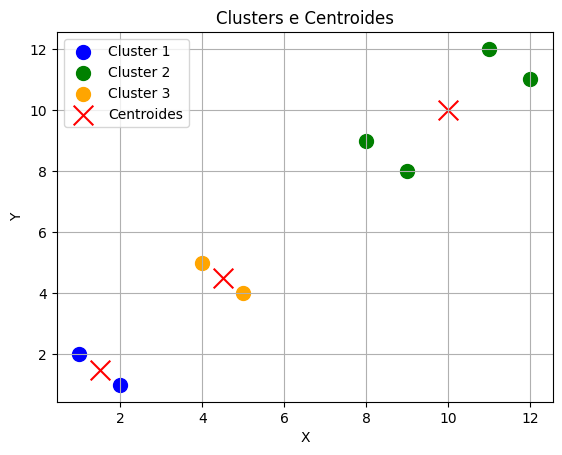

In [31]:
plot_clusters(X, centroids, clusters)

## Função KMeans no Python

In [32]:
import warnings
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suprimir avisos de usuário específicos
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL*")

#### Exemplo 1 (K = 2)

In [33]:
# Inicializar o KMeans
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 clusters, semente para reprodutibilidade

In [34]:
# Dados dos pontos
X = np.array([[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5]])

# Fitar o modelo nos dados
kmeans.fit(X)

# Centróides dos clusters
centroids = kmeans.cluster_centers_

# Atribuições de cluster para cada ponto
labels = kmeans.labels_

# Imprimir os centróides e clusters no console
print("Centróides:")
print(centroids)
print("Clusters:")
print(labels)

Centróides:
[[4.33333333 5.66666667]
 [1.83333333 2.33333333]]
Clusters:
[1 1 1 0 0 0]


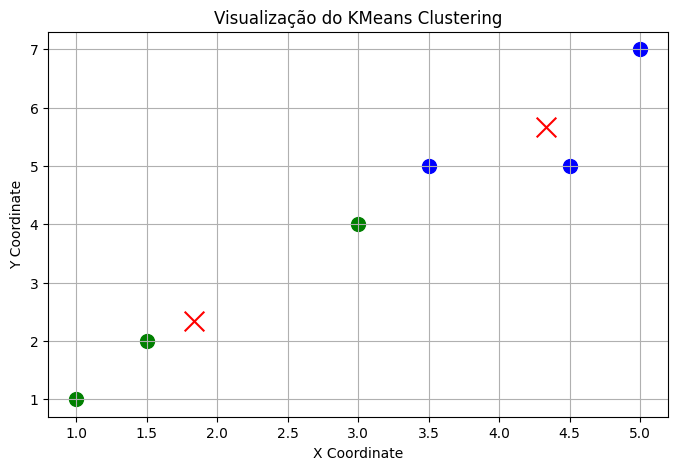

In [35]:
# Plotagem dos pontos de dados e centróides
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
colors = ['blue', 'green']  # Cores para os clusters

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], s=100, color=colors[labels[i]])  # Pontos de dados

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='x')  # Centróides
plt.title('Visualização do KMeans Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

#### Exemplo 2 (K = 2)

In [36]:
# Inicializar o KMeans
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 clusters, semente para reprodutibilidade

In [37]:
# Dados dos pontos
X = np.array([(1, 2), (2, 1), (4, 5), (5, 4), (8, 9), (9, 8), (11, 12), (12, 11)])

# Fitar o modelo nos dados
kmeans.fit(X)

# Centróides dos clusters
centroids = kmeans.cluster_centers_

# Atribuições de cluster para cada ponto
labels = kmeans.labels_

# Imprimir os centróides e clusters no console
print("Centróides:")
print(centroids)
print("Clusters:")
print(labels)

Centróides:
[[10. 10.]
 [ 3.  3.]]
Clusters:
[1 1 1 1 0 0 0 0]


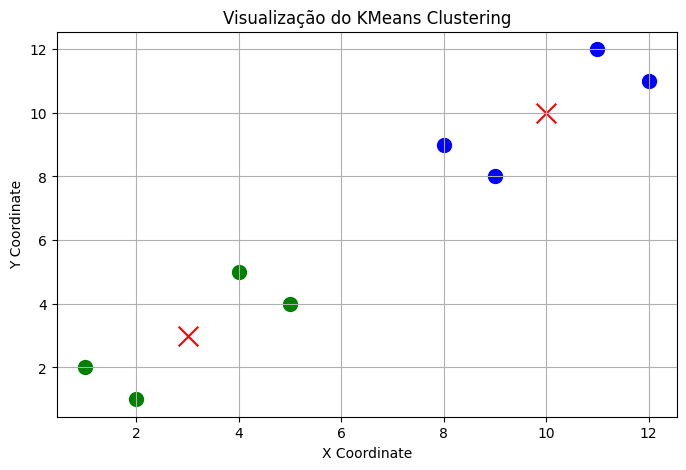

In [38]:
# Plotagem dos pontos de dados e centróides
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
colors = ['blue', 'green']  # Cores para os clusters

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], s=100, color=colors[labels[i]])  # Pontos de dados

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='x')  # Centróides
plt.title('Visualização do KMeans Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

#### Exemplo 3 (K = 3)

In [39]:
# Inicializar o KMeans
kmeans = KMeans(n_clusters=3, random_state=0)  # 3 clusters, semente para reprodutibilidade

In [40]:
# Dados dos pontos
X = np.array([(1, 2), (2, 1), (4, 5), (5, 4), (8, 9), (9, 8), (11, 12), (12, 11)])

# Fitar o modelo nos dados
kmeans.fit(X)

# Centróides dos clusters
centroids = kmeans.cluster_centers_

# Atribuições de cluster para cada ponto
labels = kmeans.labels_

# Imprimir os centróides e clusters no console
print("Centróides:")
print(centroids)
print("Clusters:")
print(labels)

Centróides:
[[10.  10. ]
 [ 4.5  4.5]
 [ 1.5  1.5]]
Clusters:
[2 2 1 1 0 0 0 0]


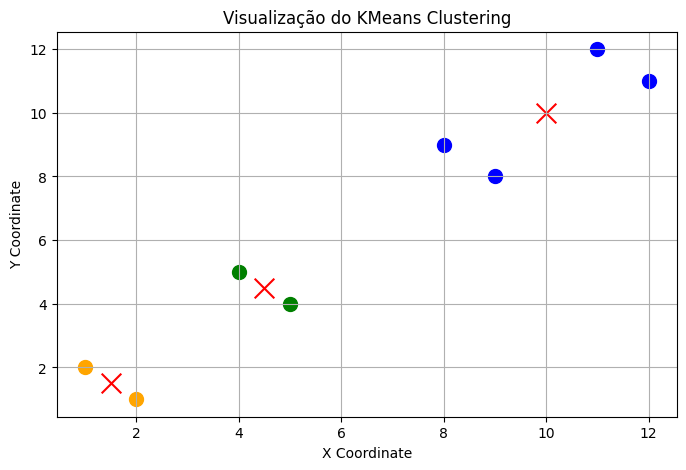

In [41]:
# Plotagem dos pontos de dados e centróides
plt.figure(figsize=(8, 5))  # Define o tamanho do gráfico
colors = ['blue', 'green','orange']  # Cores para os clusters

for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], s=100, color=colors[labels[i]])  # Pontos de dados

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='x')  # Centróides
plt.title('Visualização do KMeans Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid()
plt.show()

## Aplicando o KMeans a Uma Imagem

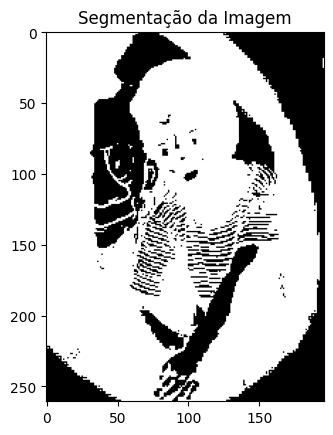

In [42]:
import numpy as np
from PIL import Image

# Carregar a imagem
imagem_path = 'garoto.png'
imagem = Image.open(imagem_path)

# Converter a imagem para um array numpy e normalizar
dados_imagem = np.array(imagem) / 255.0

# Redimensionar a imagem de (altura, largura, canais) para (altura*largura, canais)
pixels = dados_imagem.reshape(-1, 3)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pixels)

# Pegar os rótulos e remodelar para o formato original para visualização
segmentada = kmeans.labels_.reshape(dados_imagem.shape[:2])

# Visualizar o resultado (opcional)
import matplotlib.pyplot as plt
plt.imshow(segmentada, cmap = 'gray')
plt.title('Segmentação da Imagem')
plt.show()


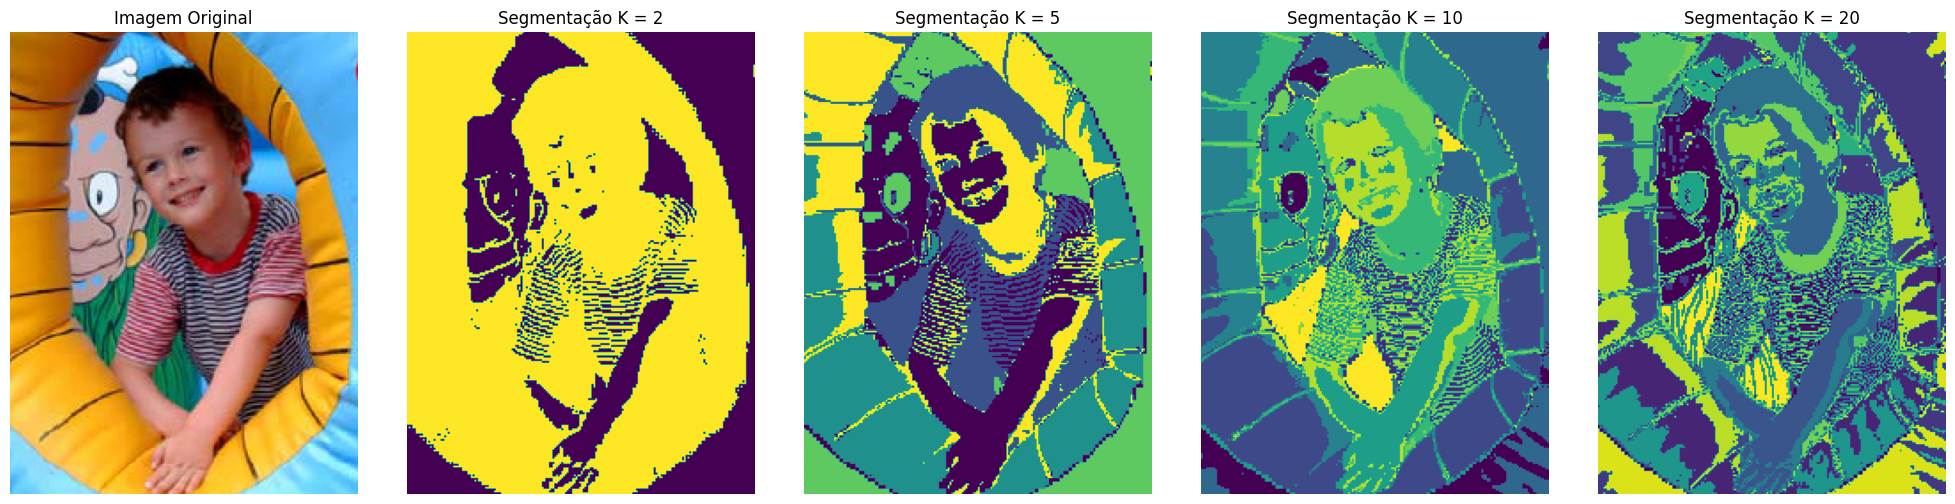

In [43]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar a imagem
imagem_path = 'garoto.png'
imagem = Image.open(imagem_path)

# Converter a imagem para um array numpy e normalizar
dados_imagem = np.array(imagem) / 255.0

# Redimensionar a imagem de (altura, largura, canais) para (altura*largura, canais)
pixels = dados_imagem.reshape(-1, 3)

# Valores de K para K-Means
k_values = [2, 5, 10, 20]

# Configurar os subplots
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(20, 5))

# Plotar a imagem original
axes[0].imshow(imagem)
axes[0].set_title('Imagem Original')
axes[0].axis('off')

# Aplicar K-Means para cada valor de K e plotar a segmentação
for i, k in enumerate(k_values):
    # Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)
    
    # Pegar os rótulos e remodelar para o formato original para visualização
    segmentada = kmeans.labels_.reshape(dados_imagem.shape[:2])
    
    # Plotar a imagem segmentada
    axes[i + 1].imshow(segmentada)
    axes[i + 1].set_title(f'Segmentação K = {k}')
    axes[i + 1].axis('off')

# Mostrar os plots
plt.tight_layout()
plt.show()
